# Berkeley Single Cell Computational Microscopy (BSCCM) dataset

In [25]:
%load_ext autoreload
%autoreload 2

from bsccm import BSCCM
from pathlib import Path
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

home = str(Path.home())
data_root = home + '/BSCCM_local/BSCCM/'

bsccm = BSCCM(data_root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM (this may take a few seconds)...
BSCCM Opened


In [28]:
bsccm.backgrounds_and_shading['Brightfield']['10_percentile']

<zarr.core.Array '/Brightfield/10_percentile' (2056, 2056) float64 read-only>

In [8]:
import numpy as np
indices = bsccm.get_indices(batch=0, antibodies='CD123')
xyz = np.array([bsccm.index_dataframe.loc[indices, 'fov_center_x'],
                bsccm.index_dataframe.loc[indices, 'fov_center_y'],
                bsccm.index_dataframe.loc[indices, 'fov_center_z']])

%matplotlib widget
import matplotlib.pyplot as plt


xyz = xyz[:, ::10] 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xyz[0], xyz[1], xyz[2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Dataset overview

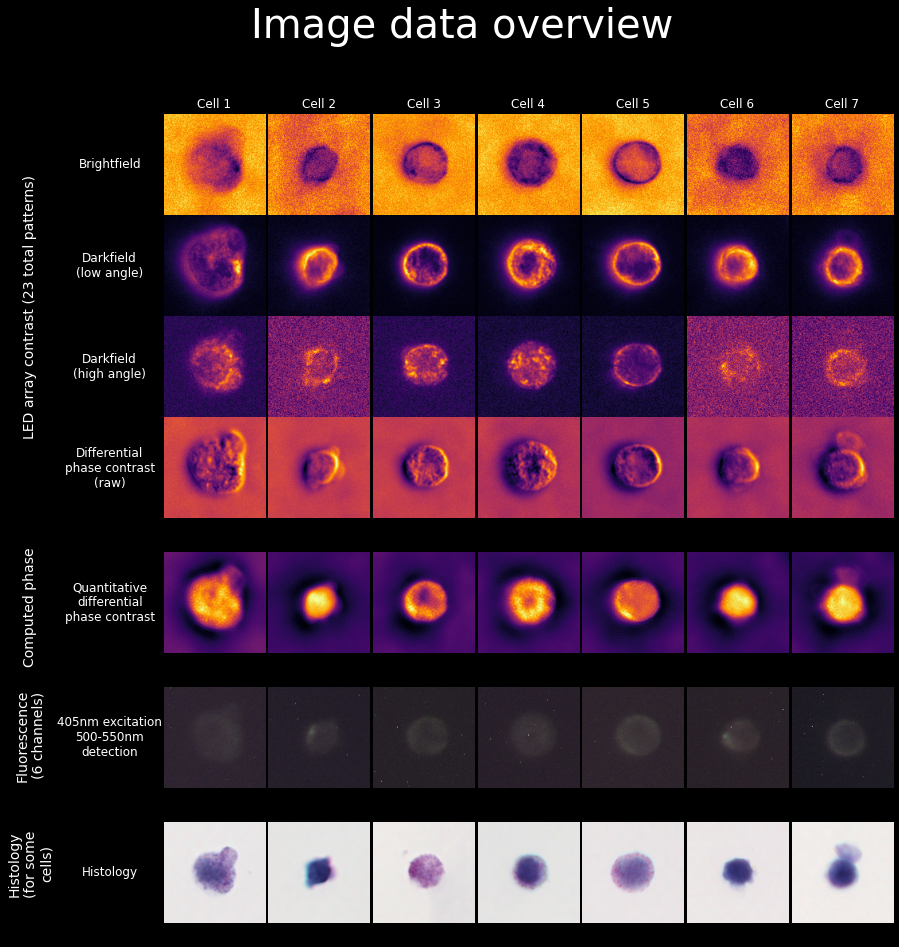

In [10]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches


num_cols = 8
cell_indices = dataset.get_indices(has_matched_histology=True, shuffle=True)[:num_cols - 1]

contrast_types = ['led_array', 'led_array', 'led_array', 'led_array', 'dpc', 'fluor', 'histology']
channels = ['Brightfield', 'DF_50', 'DF_80', 'DPC_Left', None, 'Fluor_500-550', None]
channel_display = ['Brightfield', 'Darkfield\n(low angle)',
                   'Darkfield\n(high angle)', 'Differential\nphase contrast\n(raw)',
                   'Quantitative\ndifferential\nphase contrast', '405nm excitation\n500-550nm\ndetection', 'Histology']


num_rows = 7
gs = gridspec.GridSpec(2, num_cols, wspace=0., hspace=0.)
gs_top = gs[0, :].subgridspec(4, num_cols, wspace=0., hspace=0.)
gs_bottom = gs[1, :].subgridspec(12, num_cols, wspace=0., hspace=0.)

fig = plt.figure(figsize=(15, num_rows / num_cols * 17))
fig.set_facecolor('black')
for i in range(num_rows):
    if i < 4:
        gs = gs_top
        ax = plt.subplot(gs[i, 0], facecolor='black')
    else:
        gs = gs_bottom
        ax = plt.subplot(gs[1 + 4*(i - 4):4*(i - 3), 0], facecolor='black')
    
    ax.text(0.5, 0.5, channel_display[i], horizontalalignment='center', verticalalignment='center',
                color='white', size=12)
        
    for j, index in enumerate(cell_indices):
        img = dataset.read_image(index=index, contrast_type=contrast_types[i], channel=channels[i])
        if i < 4:
            ax = plt.subplot(gs[i % 4, 1 + j], facecolor='black')
        else:
            ax = plt.subplot(gs[1 + 4 * (i - 4):4 + 4 * (i - 4), 1 + j], facecolor='black')
        ax.set_axis_off()
        if contrast_types[i] == 'histology':
            ax.imshow(img )
        else:
            ax.imshow(img, cmap='inferno')

        if i == 0:
            ax.set_title('Cell {}'.format(j + 1), color='white')

#Add labels
fig.text(0.1, 0.7, 'LED array contrast (23 total patterns)', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
fig.text(0.1, 0.42, 'Computed phase', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
fig.text(0.1, 0.3, 'Fluorescence\n(6 channels)', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
fig.text(0.1, 0.18, 'Histology\n(for some\ncells)', 
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical', color='white', size=14)
_ = fig.suptitle('Image data overview', color='white', size=40)
plt.savefig('/home/henry/leukosight_data/figures/data_overview.pdf', facecolor='black',)

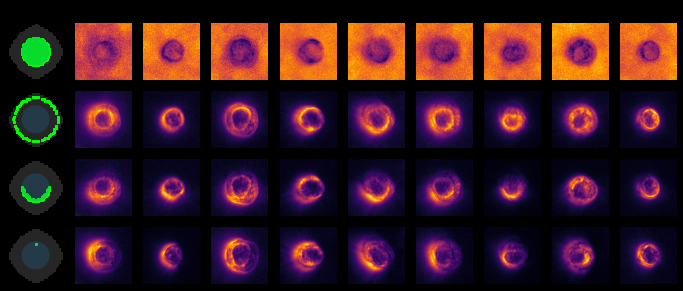

In [13]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt
import numpy as np

channel_names = dataset.led_array_channel_names

num_cols = 10
# cell_indices = np.random.choice(np.arange(dataset.size), size=num_cols - 1)
cell_indices = dataset.get_indices(has_matched_histology=True, shuffle=True)[:num_cols - 1]

channels_to_use = ['Brightfield',
  'DF_75',
  'DPC_Bottom',
  'LED119']

fig = plt.figure(figsize=(12, len(channels_to_use) / num_cols * 12))
fig.set_facecolor('black')
for i in range(len(channels_to_use)):
    ax = plt.subplot(len(channels_to_use), num_cols, i * num_cols + 1)
    plot_led_pattern(channel_name=channels_to_use[i], ax=ax, legend=False, size=8)
    ax.set_xlabel(channel_names[i], color='white')
    ax.set_axis_off()
    
    for j, index in enumerate(cell_indices):
        img = dataset.read_image(index=index, contrast_type='led_array', channel=channel_names[i])
        ax = plt.subplot(len(channels_to_use), num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno')
        ax.set_axis_off()
        if i == 0:
            ax.set_title('Cell {}'.format(j + 1))
plt.savefig('/home/henry/leukosight_data/figures/patterns_and_images.pdf', facecolor='black')

## Show a montage of many random cells

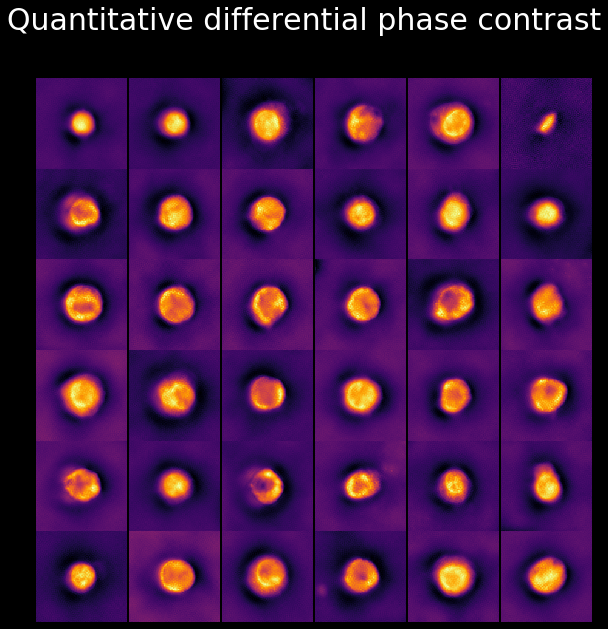

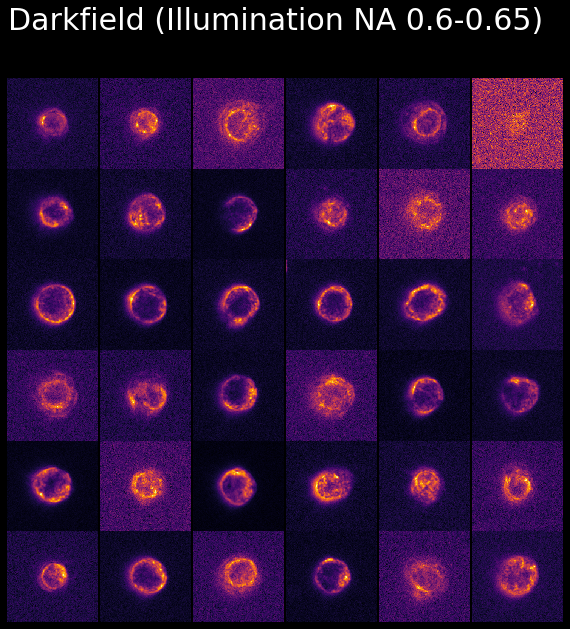

In [189]:
indices = np.random.choice(np.arange(dataset.size), size=36)

dataset.plot_montage(indices, contrast_type='dpc')
plt.gcf().suptitle('Quantitative differential phase contrast', fontsize=30, color='white')
plt.gcf().set_facecolor('black')
dataset.plot_montage(indices, contrast_type='led_array', channel='DF_60')
plt.gcf().suptitle('Darkfield (Illumination NA 0.6-0.65)', fontsize=30, color='white')
plt.gcf().set_facecolor('black')

## Plot a montage of cells with histology stain contrast

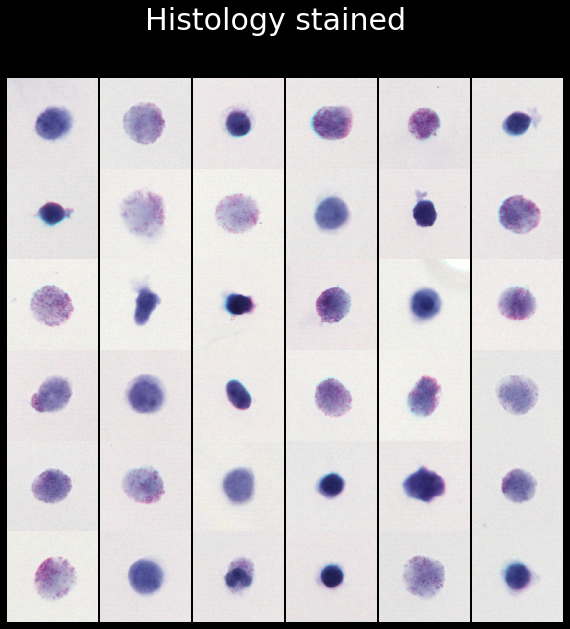

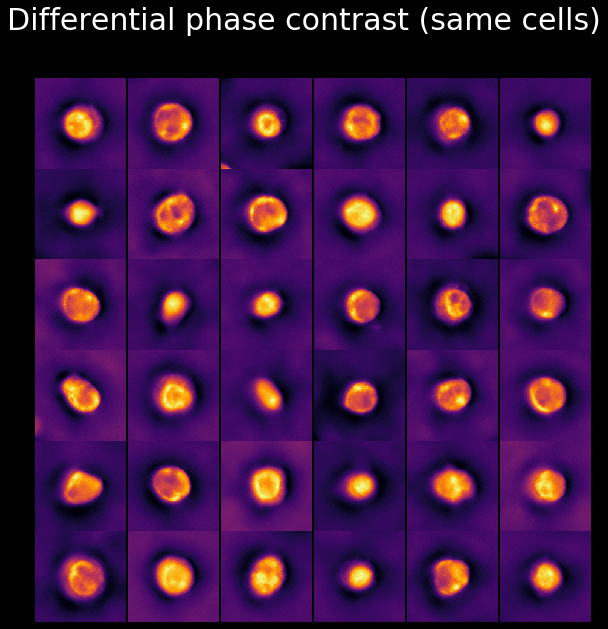

In [10]:
#Find a random set of indices for cells that have matched histology images
indices = dataset.get_indices(has_matched_histology=True, shuffle=True)[:36]
dataset.plot_montage(indices, contrast_type='histology')
plt.gcf().suptitle('Histology stained', fontsize=30, color='white')
plt.gcf().set_facecolor('black')
plt.savefig('figures/histology_montage.pdf', facecolor='black')

dataset.plot_montage(indices, contrast_type='dpc')
plt.gcf().suptitle('Differential phase contrast (same cells)', fontsize=30, color='white')
plt.gcf().set_facecolor('black')
plt.savefig('figures/dpc_montage.pdf', facecolor='black')

## LED array contrasts

In [28]:
# Print all available channels for LED array images
print('\n'.join(dataset.led_array_channel_names))

Brightfield
DF_50
DF_50_Bottom
DF_50_Right
DF_55
DF_60
DF_60_Bottom
DF_60_Right
DF_65
DF_70
DF_70_Bottom
DF_70_Right
DF_75
DF_80
DF_80_Bottom
DF_80_Right
DF_85
DF_90
DPC_Bottom
DPC_Left
DPC_Right
DPC_Top
LED119


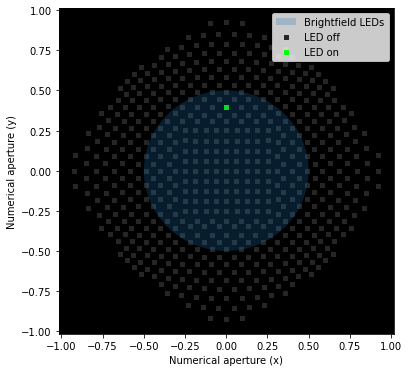

In [24]:
from led_array_calibration import plot_led_pattern, illumination_to_led_indices, get_led_na_xy, get_led_na

plt.figure(figsize=(6,6))
plot_led_pattern(channel_name='LED119', size=20)

dpc_top_leds = illumination_to_led_indices('DPC_Top')

na_xy = get_led_na_xy(dpc_top_leds)
plt.savefig('/home/henry/leukosight_data/figures/darkfield_led_pattern.pdf', transparent=True)

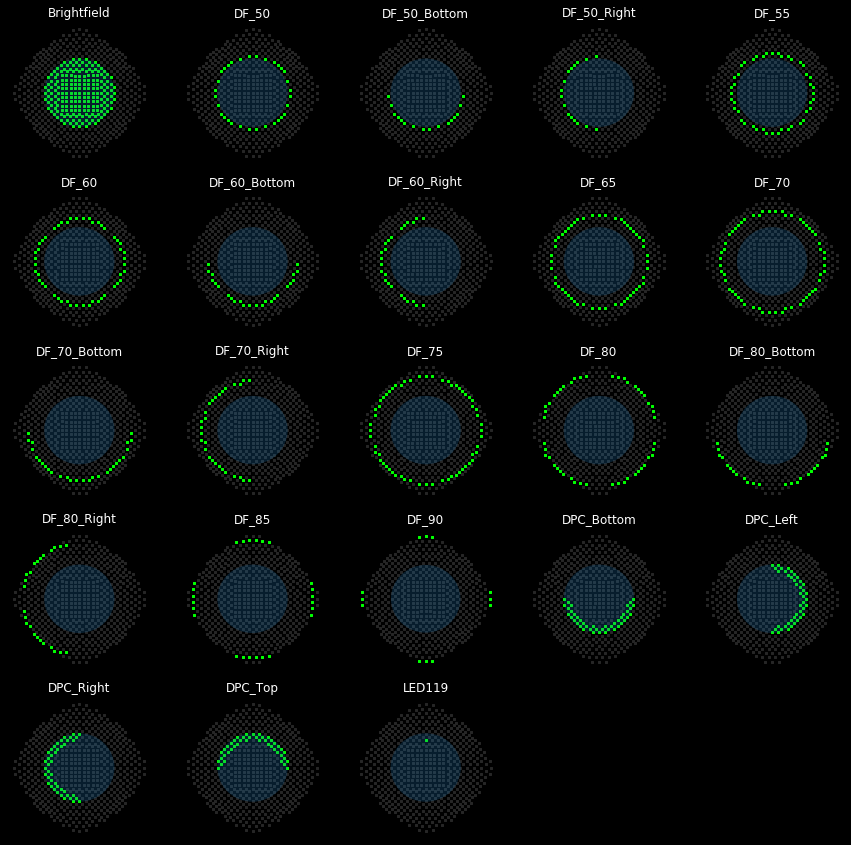

In [11]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt

channel_names = dataset.led_array_channel_names

fig = plt.figure(figsize=(15,15))
for i in range(23):
    ax = plt.subplot(5, 5, i + 1)
    plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
    ax.set_title(channel_names[i], color='white')
    ax.set_axis_off()
fig.set_facecolor('black')
plt.savefig('figures/all_led_patterns.pdf', facecolor='black')

# Figure 2 plots

In [6]:
channel_names

['Brightfield',
 'DF_50',
 'DF_50_Bottom',
 'DF_50_Right',
 'DF_55',
 'DF_60',
 'DF_60_Bottom',
 'DF_60_Right',
 'DF_65',
 'DF_70',
 'DF_70_Bottom',
 'DF_70_Right',
 'DF_75',
 'DF_80',
 'DF_80_Bottom',
 'DF_80_Right',
 'DF_85',
 'DF_90',
 'DPC_Bottom',
 'DPC_Left',
 'DPC_Right',
 'DPC_Top',
 'LED119']

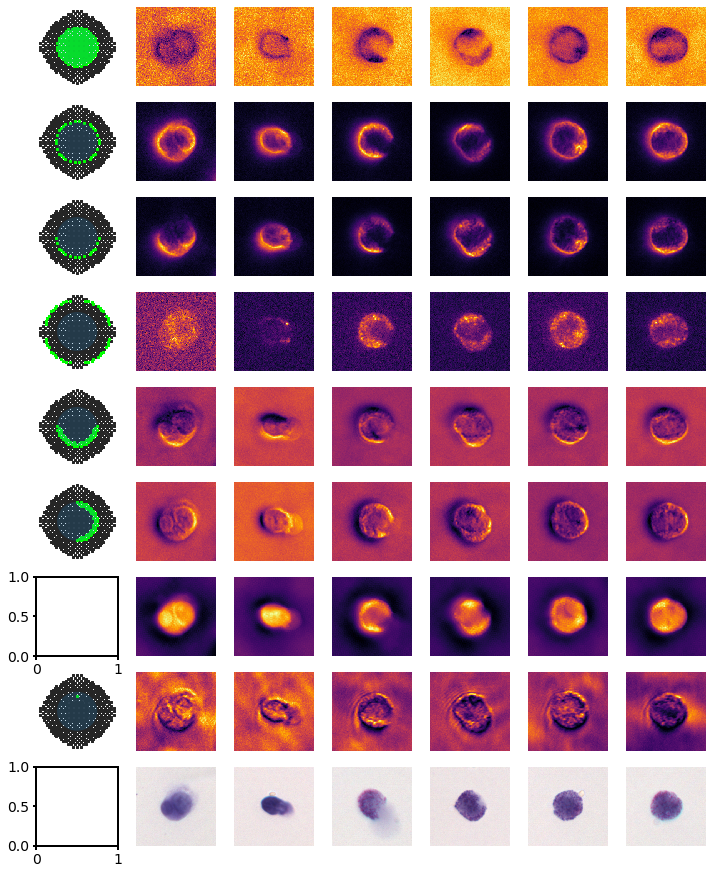

In [30]:
from bsccm.led_array_calibration import plot_led_pattern
from bsccm.creation import plot_util
import matplotlib.pyplot as plt
import numpy as np
from bsccm import BSCCM

# bsccm = BSCCM('/home/hpinkard_waller/2tb_ssd/BSCCM/')

channel_names = ['Brightfield',
             'DF_50',
             'DF_50_Bottom',
             'DF_80',
             'DPC_Bottom',
             'DPC_Left',
             'dpc',
             'LED119',
                'hist']

indices = bsccm.get_indices(has_matched_histology=True)[:6]
np.random.seed(97992454)



np.random.shuffle(indices)

num_cols = 7

fig = plt.figure(figsize=(12, len(channel_names) / num_cols * 12))
for i in range(len(channel_names)):
    ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 1)
    if channel_names[i] is not 'dpc' and channel_names[i] is not 'hist':
        plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
        ax.set_xlabel(channel_names[i])
        ax.set_axis_off()
    
    for j, index in enumerate(indices):
        if channel_names[i] == 'hist':
            contrast = 'histology'
        elif channel_names[i] == 'dpc':
            contrast = 'dpc'
        else:
            contrast= 'led_array'
        img = bsccm.read_image(index=index, contrast_type=contrast,
                               channel=channel_names[i])
        ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno', interpolation='nearest')
        ax.set_axis_off()

    
plt.savefig('patterns_and_images.pdf', transparent=True)

Opening BSCCMNIST
Opened BSCCMNIST


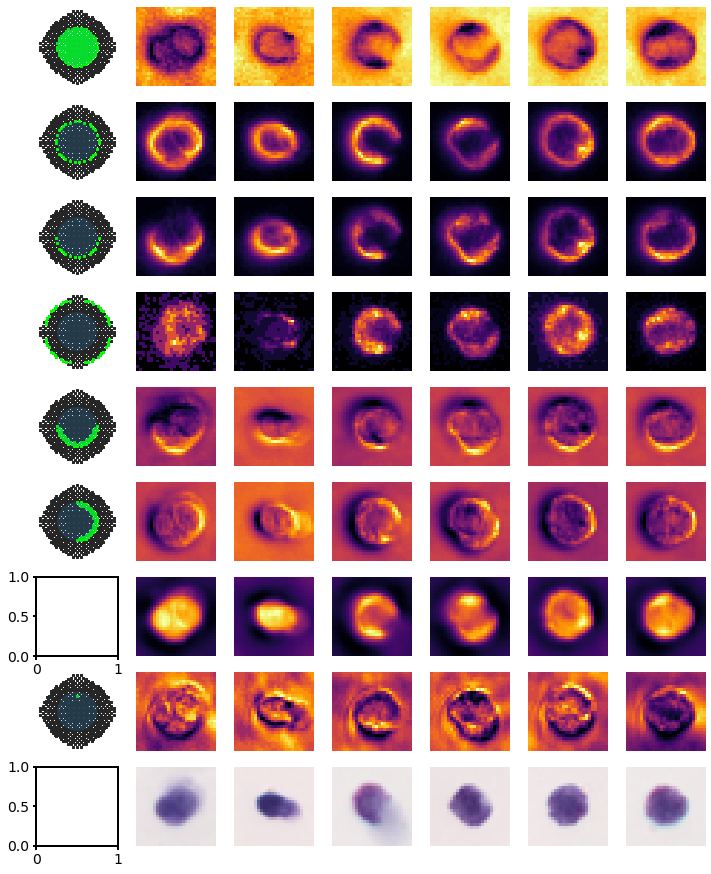

In [31]:
from bsccm.led_array_calibration import plot_led_pattern
from bsccm.creation import plot_util
import matplotlib.pyplot as plt
import numpy as np
from bsccm import BSCCM

bsccm = BSCCM('/home/hpinkard_waller/2tb_ssd/BSCCMNIST/')


fig = plt.figure(figsize=(12, len(channel_names) / num_cols * 12))
for i in range(len(channel_names)):
    ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 1)
    if channel_names[i] is not 'dpc' and channel_names[i] is not 'hist':
        plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
        ax.set_xlabel(channel_names[i])
        ax.set_axis_off()
    
    for j, index in enumerate(indices):
        if channel_names[i] == 'hist':
            contrast = 'histology'
        elif channel_names[i] == 'dpc':
            contrast = 'dpc'
        else:
            contrast= 'led_array'
        img = bsccm.read_image(index=index, contrast_type=contrast,
                               channel=channel_names[i])
        ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno', interpolation='nearest')
        ax.set_axis_off()
plt.savefig('patterns_and_images_MNSIT.pdf', transparent=True)

In [32]:
bsccm = BSCCM('/home/hpinkard_waller/2tb_ssd/BSCCM-coherent/')


Opening BSCCM-coherent
Opened BSCCM-coherent


In [38]:

bsccm.led_array_channel_names.shuffle()

AttributeError: 'list' object has no attribute 'shuffle'

In [5]:
from bsccm.led_array_calibration import plot_led_pattern
from bsccm.creation import plot_util
import matplotlib.pyplot as plt
import numpy as np
from bsccm import BSCCM

bsccm = BSCCM('/home/hpinkard_waller/2tb_ssd/BSCCM-coherent/')

channel_names = ['Brightfield',
             'DF_50',
             'DF_50_Bottom',
             'DF_80',
             'DPC_Bottom',
             'DPC_Left',
             'dpc']

indices = bsccm.get_indices(has_matched_histology=True)[:6]
np.random.seed(97992454)



np.random.shuffle(indices)

num_cols = 7

fig = plt.figure(figsize=(12, len(channel_names) / num_cols * 12))
for i in range(len(channel_names)):
    ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 1)
    if channel_names[i] is not 'dpc' and channel_names[i] is not 'hist':
        plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
        ax.set_xlabel(channel_names[i])
        ax.set_axis_off()
    
    for j, index in enumerate(indices):
        if channel_names[i] == 'hist':
            contrast = 'histology'
        elif channel_names[i] == 'dpc':
            contrast = 'dpc'
        else:
            contrast= 'led_array'
        img = bsccm.read_image(index=index, contrast_type=contrast,
                               channel=channel_names[i])
        ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno', interpolation='nearest')
        ax.set_axis_off()

    
plt.savefig('patterns_and_images.pdf', transparent=True)

Opening BSCCM-coherent
Opened BSCCM-coherent


AttributeError: 'DataFrame' object has no attribute 'has_matched_histology_cell'

# BSCCM Coherent

Opening BSCCM-coherent
Opened BSCCM-coherent


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


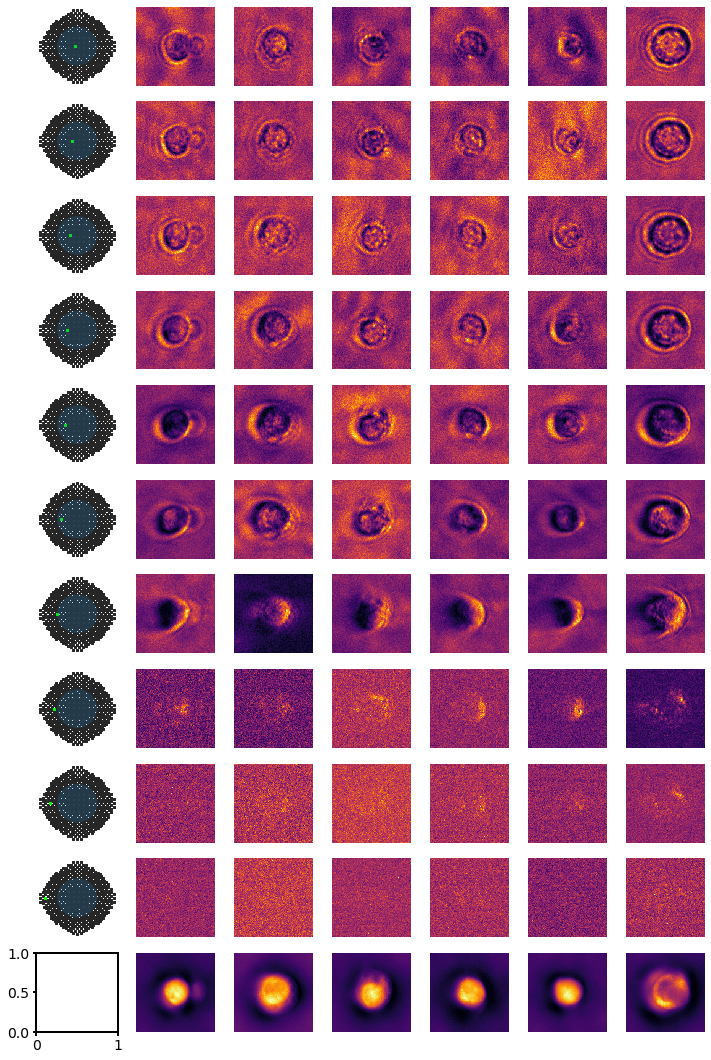

In [1]:
from bsccm.led_array_calibration import plot_led_pattern
from bsccm.creation import plot_util
import matplotlib.pyplot as plt
import numpy as np
from bsccm import BSCCM

bsccm = BSCCM('/home/hpinkard_waller/2tb_ssd/BSCCM-coherent/')



indices = np.random.choice(bsccm.get_indices(), 6, replace=False)

# c_indices = np.arange(300)
# np.random.shuffle(c_indices)
# channel_names = [bsccm.led_array_channel_names[i] for i in c_indices[:num_cols-1]]

num_cols = 7


channel_names = [
'led_2',
'led_10',
'led_26',
'led_46',
'led_82',
'led_118',
'led_186',
'led_254',
'led_346',
'led_446',
]
channel_names += ['dpc']



fig = plt.figure(figsize=(12, len(channel_names) / num_cols * 12))
for i in range(len(channel_names)):
    ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 1)
    if channel_names[i] is not 'dpc' and channel_names[i] is not 'hist':
        plot_led_pattern(channel_name=channel_names[i], ax=ax, legend=False, size=8)
        ax.set_xlabel(channel_names[i])
        ax.set_axis_off()
    
    for j, index in enumerate(indices):
        if channel_names[i] == 'hist':
            contrast = 'histology'
        elif channel_names[i] == 'dpc':
            contrast = 'dpc'
        else:
            contrast= 'led_array'
        img = bsccm.read_image(index=index, contrast_type=contrast,
                               channel=channel_names[i])
        ax = plt.subplot(len(channel_names), num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno', interpolation='nearest')
        ax.set_axis_off()
       
plt.savefig('patterns_for_coherent.pdf', transparent=True)

In [25]:
%load_ext autoreload
%autoreload 2

from bsccm import BSCCM
from pathlib import Path
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

home = str(Path.home())
data_root = home + '/BSCCM_local/BSCCM-coherent/'

bsccm = BSCCM(data_root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM (this may take a few seconds)...
BSCCM Opened


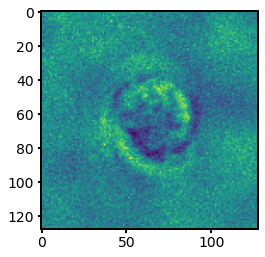

In [44]:
plt.figure()
plt.imshow(bsccm.read_image(67,contrast_type='led_array', channel='led_90'))

In [45]:
from led_array_calibration import plot_led_pattern
import matplotlib.pyplot as plt
import numpy as np

channel_names = bsccm.led_array_channel_names

num_cols = 8
cell_indices = np.random.choice(np.arange(bsccm.size), size=num_cols - 1)

fig = plt.figure(figsize=(12, 10 / num_cols * 12))
fig.set_facecolor('black')
channel_indices = np.random.choice(np.arange(540), 10)
for i in range(len(channel_indices)):
    ax = plt.subplot(10, num_cols, i * num_cols + 1)
    plot_led_pattern(channel_name=channel_names[channel_indices[i]], ax=ax, legend=False, size=8)
    ax.set_xlabel(channel_names[i], color='white')
    ax.set_axis_off()
    
    for j, index in enumerate(cell_indices):
        img = bsccm.read_image(index=index, contrast_type='led_array', channel=channel_names[i])
        ax = plt.subplot(10, num_cols, i * num_cols + 2 + j)
        ax.imshow(img, cmap='inferno')
        ax.set_axis_off()
        if i == 0:
            ax.set_title('Cell {}'.format(j + 1))

fig.savefig('/home/henry/leukosight_data/figures/bsccm_coherent.pdf', transparent=True)

ModuleNotFoundError: No module named 'led_array_calibration'